<a href="https://colab.research.google.com/github/krahul2024/machine-learning/blob/main/tensors/tensors_three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [17]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Rest

### Some Random stfuff related to classification

In [8]:
# creating circles using scikit-learn's make_circles()
from sklearn.datasets import make_circles

n_samples = 1000
x, y = make_circles(
    n_samples,
    noise = 0.03,
    random_state = 0
)
# x is a matrix of values
# y is array of labels , reprsenting an array belongs to which class, this one gives 2 classes, so the labels are [0,1]

In [7]:
x, y[:10]

(array([[ 0.80993549, -0.053514  ],
        [-0.13448628, -0.74209474],
        [-0.81250606, -0.62424399],
        ...,
        [-0.03234372,  0.73742125],
        [ 0.60763385,  0.52905531],
        [-0.55730617,  0.57250972]]),
 array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1]))

In [15]:
# using pandas to make dataframe and labels
circles = pd.DataFrame({
    'x0' : x[:,0],  # first column as x0
    'x1' : x[:,1],  # second column as x1
    'label' : y # labels column , belonging to either first or second class
})

circles.head()

,x0,x1,label
0,0.809935,-0.053514,1
1,-0.134486,-0.742095,1
2,-0.812506,-0.624244,0
3,0.583074,0.496568,1
4,-0.461320,0.659836,1


In [16]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

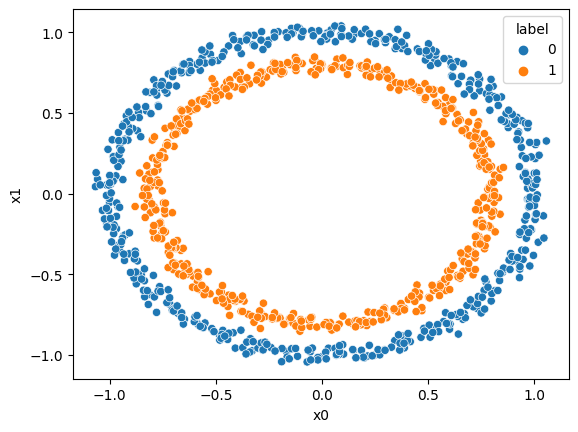

In [56]:
# splitting the data into training and testing set
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(
    x, y,
    test_size = 0.19,
    train_size = 0.81
)

# visualizing the plots
sns.scatterplot(
    # x = x[:, 0],
    # y = x[:,1],
    data = circles,
    x = 'x0',
    y = 'x1',
    hue = 'label',
)


input_shape = [x.shape[1]]

In [43]:
from tensorflow import keras
from keras import layers, Sequential

# Create the model
model_one = Sequential([
    layers.Dense(1),
    layers.Dense(1),
])

# compile the model
model_one.compile(
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.SGD(),
    metrics = ['accuracy']
)

# fit/train the model
history = model_one.fit(
    x, y,
    epochs = 200,
    verbose = 0
)
# history.history['accuracy']

model_one.evaluate(x, y)


32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000


[7.624619007110596, 0.5]

<Axes: >

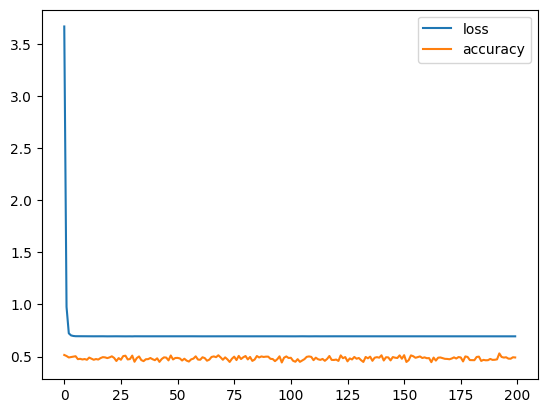

In [38]:
pd.DataFrame(history.history).plot()

This is not good to have accuracy of 50%, which is equivalent to guessing as it is binary.

Making the model more complex

In [59]:
# Create the model
model_two = Sequential([
    layers.Dense(
        units = 80,
        activation = 'relu',
        input_shape = input_shape
    ),
    layers.Dense(
        units = 80,
        activation= 'relu'
    ),
    layers.Dense(
        units = 1
    )
])

# compile the model
model_two.compile(
    loss = keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy'],
    optimizer = keras.optimizers.SGD()
)

# fit/train the model
history = model_two.fit(
    x_train, y_train,
    epochs = 60,
    verbose = 0
)

# evaluating the model
model_two.evaluate(x_valid, y_valid)

6/6 [==============================] - 0s 5ms/step - loss: 0.0895 - accuracy: 1.0000


[0.08946782350540161, 1.0]

<Axes: >

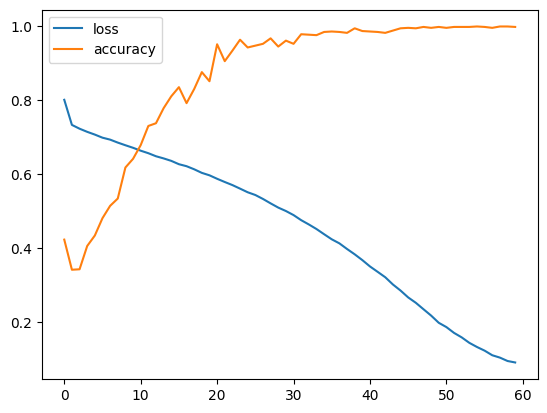

In [60]:
pd.DataFrame(history.history).plot()